In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load data

In [3]:
titanic_data=pd.read_csv("titanic_train.csv")

In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
len(titanic_data)

891

### Data Dictionary
survival: Survival	0 = No, 1 = Yes

pclass  : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

sex     : Sex	

Age     : Age in years	

sibsp   : Number of siblings / spouses aboard the Titanic	

parch	: Number of parents / children aboard the Titanic	

ticket	: Ticket number	

fare	: Passenger fare	

cabin	: Cabin number	

embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Variable Notes

pclass : A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age    : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp  : The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse  = husband, wife (mistresses and fiancés were ignored)

parch  : The dataset defines family relations in this way...

Parent = mother, father
Child  = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.



In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### countplot of subrvived vs not survived

<Axes: xlabel='Survived', ylabel='count'>

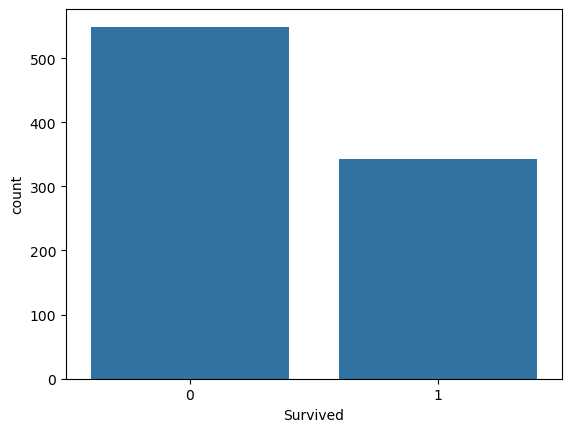

In [13]:
sns.countplot(x="Survived", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

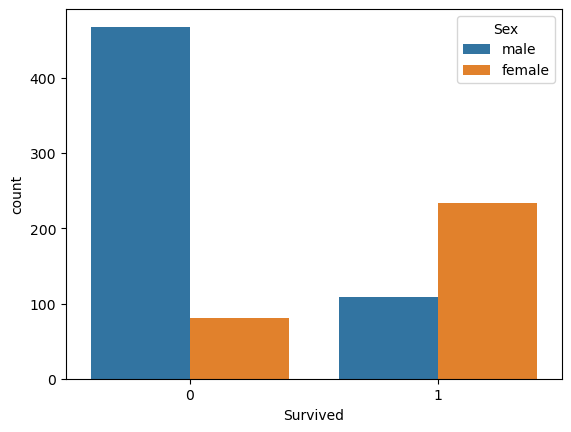

In [14]:
sns.countplot(x="Survived", data=titanic_data, hue='Sex')

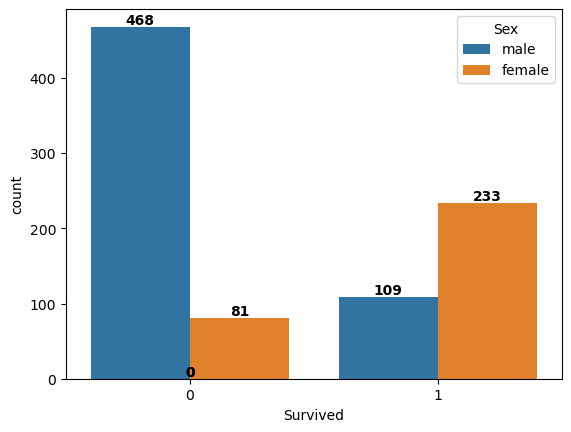

In [15]:
ax = sns.countplot(x="Survived", data=titanic_data, hue="Sex")

# Annotate values at the top of the bars
for p in ax.patches:
    value = int(p.get_height())  # Height of the bar
    x_position = p.get_x() + p.get_width() / 2  # x-center position of the bar
    y_position = p.get_height()   # y-position at the top of the bar
    ax.annotate(f'{value}', (x_position, y_position), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

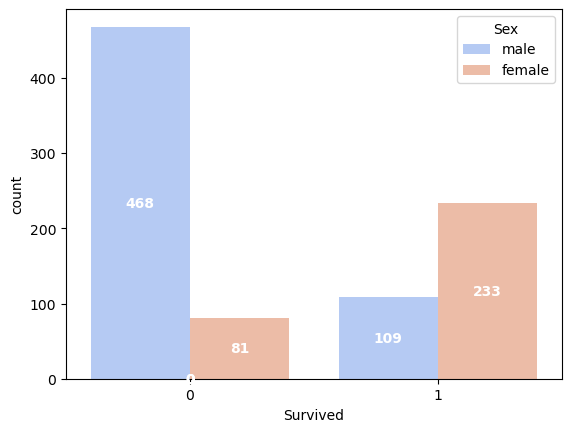

In [16]:
ax = sns.countplot(x="Survived", data=titanic_data, hue="Sex", palette="coolwarm")

# Annotate values at the center of the bars
for p in ax.patches:
    value = int(p.get_height())  # Height of the bar (count)
    x_position = p.get_x() + p.get_width() / 2 # x-center position of the bar
    y_position = p.get_height() / 2  # y-position at the center of the bar
    ax.annotate(f'{value}', (x_position, y_position), 
                ha='center', va='center', fontsize=10, color='white', fontweight='bold')

### Null Values

In [18]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

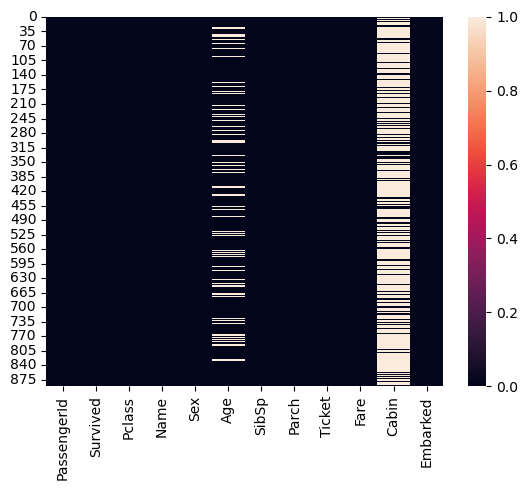

In [19]:
sns.heatmap(titanic_data.isna())

#### find the % of null values in age column

In [21]:
titanic_data["Age"].isna().sum()/len(titanic_data["Age"])*100

19.865319865319865

#### find the % of null values in cabin column

In [23]:
titanic_data["Cabin"].isna().sum()/len(titanic_data["Cabin"])*100

77.10437710437711

#### find the distribution for the age column

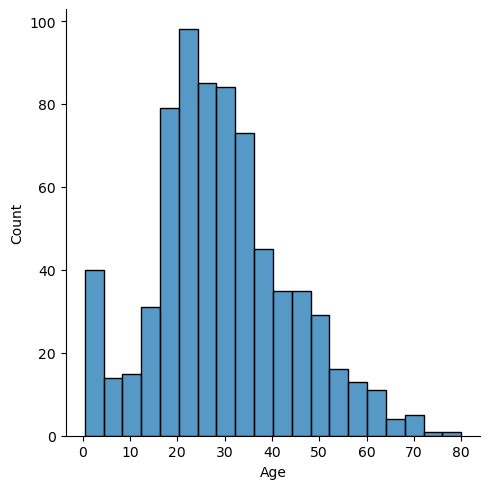

In [25]:
sns.displot(x="Age", data=titanic_data)

### Data Cleaning

In [27]:
titanic_data1=titanic_data

In [28]:
titanic_data1["Age"].mean()

29.69911764705882

In [29]:
titanic_data1["Age"]=titanic_data1["Age"].fillna(titanic_data1["Age"].mean())


In [30]:
titanic_data[titanic_data["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

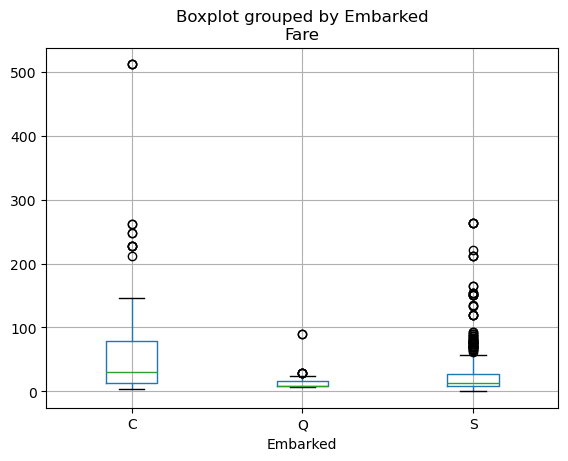

In [31]:
titanic_data.boxplot(column="Fare", by="Embarked")

In [32]:
titanic_data1["Embarked"]=titanic_data1["Embarked"].fillna("C")

In [33]:
titanic_data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [34]:
titanic_data1.drop("Cabin", axis=1, inplace=True)

In [35]:
titanic_data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [37]:
titanic_data1["Age"] = titanic_data1['Age'].astype(int)

In [38]:
titanic_data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#### convert sex column to numerical values

In [40]:
pd.get_dummies(titanic_data1["Sex"]).astype(int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [41]:
gender = pd.get_dummies(titanic_data1["Sex"], drop_first=True).astype(int)

In [42]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [43]:
titanic_data1["Gender"]=gender

In [44]:
titanic_data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [45]:
titanic_data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1


#### drop the columns with are not required

In [47]:
titanic_data1.drop(["Name","Sex","Ticket"], axis=1, inplace=True)

In [48]:
titanic_data1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,1,0,3,22,1,0,7.2500,S,1
1,2,1,1,38,1,0,71.2833,C,0
2,3,1,3,26,0,0,7.9250,S,0
3,4,1,1,35,1,0,53.1000,S,0
4,5,0,3,35,0,0,8.0500,S,1


#### Seperate dependent and Independent variable

In [50]:
x=titanic_data1[["PassengerId","Pclass","Age","Gender","SibSp","Parch","Fare","Embarked","Gender"]]
y=titanic_data1["Survived"]


In [51]:
x

,PassengerId,Pclass,Age,Gender,SibSp,Parch,Fare,Embarked,Gender
0,1,3,22,1,1,0,7.2500,S,1
1,2,1,38,0,1,0,71.2833,C,0
2,3,3,26,0,0,0,7.9250,S,0
3,4,1,35,0,1,0,53.1000,S,0
4,5,3,35,1,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27,1,0,0,13.0000,S,1
887,888,1,19,0,0,0,30.0000,S,0
888,889,3,29,0,1,2,23.4500,S,0
889,890,1,26,1,0,0,30.0000,C,1


In [52]:
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64